<h1>Lecture 02: Machine Learning Basics:<br>
Under/Over fitting, Regularization and Clustering</h1>

<h2>Learning curves</h2>

<h3>High bias(under fitting)</h3>

If a learning algorithm is suffering from high bias, getting more training data will not (by itself) help much.

<h3>High variance(over fitting)</h3>

If a learning algorithm is suffering from high variance, getting more training data is likely to help.


<h2>Debugging a learning algorithm</h2>

*   For fixes high variance
    *   Get more training examples
    *   Try smaller sets of features
    *   Try increasing λ
*   For fixes high bias
    *   Try getting additional features
    *   Try adding polynomial features
    *   Try decreasing λ



# Scikit-learn

In [1]:
import os
import numpy as np
import pandas as pd
import sklearn

# Classification

## Read data (Titanic dataset)

https://www.kaggle.com/c/titanic/overview

In [2]:
data_path = './data/titanic/'

train_data_path = os.path.join(data_path, 'train.csv')
test_data_path = os.path.join(data_path, 'test.csv')

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

In [3]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Preprocessing

In [7]:
# 사용할 feature를 indexing
input_features = ['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Cabin', 'Embarked']
output_features = ['Survived']

X = train_df[input_features]
y = train_df[output_features]

In [8]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S
887,1,female,19.0,0,0,30.0000,B42,S
888,3,female,NaN,1,2,23.4500,NaN,S
889,1,male,26.0,0,0,30.0000,C148,C


In [9]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [10]:
# fill nan
X = X.fillna(-1)

# categorization
X['Sex'] = X['Sex'].astype('category').cat.codes
X['Cabin'] = X['Cabin'].astype('category').cat.codes
X['Embarked'] = X['Embarked'].astype('category').cat.codes

In [11]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,0,3
1,1,0,38.0,1,0,71.2833,82,1
2,3,0,26.0,0,0,7.9250,0,3
3,1,0,35.0,1,0,53.1000,56,3
4,3,1,35.0,0,0,8.0500,0,3
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,3
887,1,0,19.0,0,0,30.0000,31,3
888,3,0,-1.0,1,2,23.4500,0,3
889,1,1,26.0,0,0,30.0000,61,1


In [12]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


## Split data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [16]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((569, 8), (569, 1), (143, 8), (143, 1), (179, 8), (179, 1))

## Select & Fit model

https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

In [20]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()

In [21]:
model.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [22]:
# prediction
pred = model.predict(X_val)

In [24]:
pred

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1])

In [25]:
model.score(X_val, y_val)

0.7762237762237763

In [26]:
model.score(X_test, y_test)

0.7932960893854749

- Try SVM model

In [27]:
from sklearn.svm import SVC


model = SVC()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [28]:
model.score(X_val, y_val)

0.6503496503496503

In [29]:
model.score(X_test, y_test)

0.6983240223463687

# Regression

## Read data (house price dataset)

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [30]:
data_path = './data/house-prices-advanced-regression-techniques/'

train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))
test_df = pd.read_csv(os.path.join(data_path, 'test.csv'))

In [31]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [32]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

## Data Preprocessing

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [34]:
# fill nan
train_df = train_df.fillna(-1)

In [35]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,-1,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,-1,-1,-1,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,-1,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,-1,-1,-1,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,-1,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,-1,-1,-1,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,-1,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,-1,-1,-1,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,-1,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,-1,-1,-1,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,-1,-1,-1,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,-1,MnPrv,-1,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,-1,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,...,Y,FuseA,1078,0,0,1078,1

In [36]:
# change object data to category
for column in train_df.columns:
    if train_df[column].dtype == 'object':
        train_df[column] = train_df[column].astype('category').cat.codes

In [37]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,2,196.0,2,4,2,3,4,4,3,706,6,0,150,856,1,...,1,5,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,0,2,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,3,0.0,3,4,1,3,4,2,1,978,6,0,284,1262,1,...,1,5,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,2,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,2,162.0,2,4,2,3,4,3,3,486,6,0,434,920,1,...,1,5,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,2,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,3,0.0,3,4,0,4,2,4,1,216,6,0,540,756,1,...,1,5,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,6,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,2,350.0,2,4,2,3,4,1,3,655,6,0,490,1145,1,...,1,5,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,2,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,0,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,3,0.0,3,4,2,3,4,4,6,0,6,0,953,953,1,...,1,5,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,5,2,1999.0,2,2,460,5,5,2,0,40,0,0,0,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,0,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,4,119.0,3,4,1,3,4,4,1,790,5,163,589,1542,1,...,1,5,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,5,2,1978.0,3,2,500,5,5,2,349,0,0,0,0,0,0,3,0,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,0,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,3,0.0,0,2,4,4,2,4,3,275,6,0,877,1152,1,...,1,5,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,3,2,1941.0,2,1,252,5,5,2,0,60,0,0,0,0,0,1,3,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,0,3,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,3,0.0,3,4,1,4,4,3,3,49,5,1029,0,1078,1,...,1,1,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,0,2,1950.0,3,1,240,5,5,2,366,0,112,0,0,0,0,0,0,0,4,2010,8,4,142125


In [38]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,2,196.0,2,4,2,3,4,4,3,706,6,0,150,856,1,...,1,5,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,0,2,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,3,0.0,3,4,1,3,4,2,1,978,6,0,284,1262,1,...,1,5,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,2,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,2,162.0,2,4,2,3,4,3,3,486,6,0,434,920,1,...,1,5,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,2,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,3,0.0,3,4,0,4,2,4,1,216,6,0,540,756,1,...,1,5,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,6,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,2,350.0,2,4,2,3,4,1,3,655,6,0,490,1145,1,...,1,5,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,2,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,0,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,3,0.0,3,4,2,3,4,4,6,0,6,0,953,953,1,...,1,5,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,5,2,1999.0,2,2,460,5,5,2,0,40,0,0,0,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,0,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,4,119.0,3,4,1,3,4,4,1,790,5,163,589,1542,1,...,1,5,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,5,2,1978.0,3,2,500,5,5,2,349,0,0,0,0,0,0,3,0,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,0,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,3,0.0,0,2,4,4,2,4,3,275,6,0,877,1152,1,...,1,5,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,3,2,1941.0,2,1,252,5,5,2,0,60,0,0,0,0,0,1,3,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,0,3,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,3,0.0,3,4,1,4,4,3,3,49,5,1029,0,1078,1,...,1,1,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,0,2,1950.0,3,1,240,5,5,2,366,0,112,0,0,0,0,0,0,0,4,2010,8,4,142125


In [39]:
# input feature와 output feature를 구분
X = train_df[[feature for feature in train_df.columns if feature not in ['SalePrice', 'Id']]]
y = train_df[['SalePrice']]

In [40]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,0,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,2,196.0,2,4,2,3,4,4,3,706,6,0,150,856,1,0,1,5,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,0,2,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,0,0,0,0,2,2008,8,4
1,20,3,80.0,9600,1,0,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,3,0.0,3,4,1,3,4,2,1,978,6,0,284,1262,1,0,1,5,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,2,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,0,0,0,0,5,2007,8,4
2,60,3,68.0,11250,1,0,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,2,162.0,2,4,2,3,4,3,3,486,6,0,434,920,1,0,1,5,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,2,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,0,0,0,0,9,2008,8,4
3,70,3,60.0,9550,1,0,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,3,0.0,3,4,0,4,2,4,1,216,6,0,540,756,1,2,1,5,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,6,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,0,0,0,0,2,2006,8,0
4,60,3,84.0,14260,1,0,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,2,350.0,2,4,2,3,4,1,3,655,6,0,490,1145,1,0,1,5,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,2,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,0,0,0,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,0,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,3,0.0,3,4,2,3,4,4,6,0,6,0,953,953,1,0,1,5,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,5,2,1999.0,2,2,460,5,5,2,0,40,0,0,0,0,0,0,0,0,8,2007,8,4
1456,20,3,85.0,13175,1,0,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,4,119.0,3,4,1,3,4,4,1,790,5,163,589,1542,1,4,1,5,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,5,2,1978.0,3,2,500,5,5,2,349,0,0,0,0,0,0,3,0,0,2,2010,8,4
1457,70,3,66.0,9042,1,0,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,3,0.0,0,2,4,4,2,4,3,275,6,0,877,1152,1,0,1,5,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,3,2,1941.0,2,1,252,5,5,2,0,60,0,0,0,0,0,1,3,2500,5,2010,8,4
1458,20,3,68.0,9717,1,0,3,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,3,0.0,3,4,1,4,4,3,3,49,5,1029,0,1078,1,2,1,1,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,0,2,1950.0,3,1,240,5,5,2,366,0,112,0,0,0,0,0,0,0,4,2010,8,4


In [41]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


## Data Split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [43]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((934, 79), (934, 1), (234, 79), (234, 1), (292, 79), (292, 1))

## Standardization

In [44]:
from sklearn.preprocessing import StandardScaler


scalerX = StandardScaler()
scalerY = StandardScaler()

In [45]:
scalerX.fit(X_train)
scalerY.fit(y_train)

StandardScaler()

In [46]:
scalerX.mean_, scalerX.var_

(array([5.71788009e+01, 3.05032120e+00, 5.67858672e+01, 1.07702602e+04,
        9.96788009e-01, 9.20770878e-02, 1.92719486e+00, 2.78800857e+00,
        1.07066381e-03, 2.93790150e+00, 6.53104925e-02, 1.22708779e+01,
        2.01070664e+00, 2.01284797e+00, 4.83940043e-01, 3.05674518e+00,
        6.10706638e+00, 5.60278373e+00, 1.97042291e+03, 1.98473448e+03,
        1.43897216e+00, 1.06852248e+00, 9.65096360e+00, 1.03982869e+01,
        2.74411135e+00, 1.03765525e+02, 2.53854390e+00, 3.70556745e+00,
        1.40149893e+00, 3.20021413e+00, 3.71734475e+00, 3.19700214e+00,
        3.62098501e+00, 4.52292291e+02, 5.60064240e+00, 4.38608137e+01,
        5.65693790e+02, 1.06184690e+03, 1.03961456e+00, 1.57387580e+00,
        9.28265525e-01, 4.68629550e+00, 1.16972805e+03, 3.54776231e+02,
        5.56852248e+00, 1.53007281e+03, 4.23982869e-01, 6.20985011e-02,
        1.56745182e+00, 3.77944325e-01, 2.90256959e+00, 1.04710921e+00,
        2.33618844e+00, 6.59528908e+00, 5.71948608e+00, 6.295503

In [47]:
scalerY.mean_, scalerY.var_

(array([181034.54068522]), array([5.83864132e+09]))

In [48]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,0,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,2,196.0,2,4,2,3,4,4,3,706,6,0,150,856,1,0,1,5,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,0,2,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,0,0,0,0,2,2008,8,4
1,20,3,80.0,9600,1,0,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,3,0.0,3,4,1,3,4,2,1,978,6,0,284,1262,1,0,1,5,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,2,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,0,0,0,0,5,2007,8,4
2,60,3,68.0,11250,1,0,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,2,162.0,2,4,2,3,4,3,3,486,6,0,434,920,1,0,1,5,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,2,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,0,0,0,0,9,2008,8,4
3,70,3,60.0,9550,1,0,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,3,0.0,3,4,0,4,2,4,1,216,6,0,540,756,1,2,1,5,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,6,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,0,0,0,0,2,2006,8,0
4,60,3,84.0,14260,1,0,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,2,350.0,2,4,2,3,4,1,3,655,6,0,490,1145,1,0,1,5,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,2,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,0,0,0,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,0,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,3,0.0,3,4,2,3,4,4,6,0,6,0,953,953,1,0,1,5,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,5,2,1999.0,2,2,460,5,5,2,0,40,0,0,0,0,0,0,0,0,8,2007,8,4
1456,20,3,85.0,13175,1,0,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,4,119.0,3,4,1,3,4,4,1,790,5,163,589,1542,1,4,1,5,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,5,2,1978.0,3,2,500,5,5,2,349,0,0,0,0,0,0,3,0,0,2,2010,8,4
1457,70,3,66.0,9042,1,0,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,3,0.0,0,2,4,4,2,4,3,275,6,0,877,1152,1,0,1,5,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,3,2,1941.0,2,1,252,5,5,2,0,60,0,0,0,0,0,1,3,2500,5,2010,8,4
1458,20,3,68.0,9717,1,0,3,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,3,0.0,3,4,1,4,4,3,3,49,5,1029,0,1078,1,2,1,1,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,0,2,1950.0,3,1,240,5,5,2,366,0,112,0,0,0,0,0,0,0,4,2010,8,4


In [49]:
scalerX.transform(X_train)

array([[ 1.47985578,  1.6010074 , -0.35717437, ..., -0.61356592,
         0.31211722, -0.70221326],
       [ 3.12881992, -0.08483354,  0.50881346, ...,  1.63966044,
         0.31211722,  0.21380236],
       [ 1.47985578, -0.08483354, -1.61425349, ..., -1.36464138,
         0.31211722,  0.21380236],
       ...,
       [-0.87580728, -0.08483354,  0.36913801, ..., -0.61356592,
         0.31211722,  0.21380236],
       [ 0.06645795, -0.08483354,  0.64848892, ..., -0.61356592,
         0.31211722,  0.21380236],
       [-0.87580728, -0.08483354,  0.89990474, ...,  1.63966044,
         0.31211722,  0.21380236]])

In [50]:
scalerX.transform(X)

array([[ 0.06645795, -0.08483354,  0.22946255, ...,  0.13750953,
         0.31211722,  0.21380236],
       [-0.87580728, -0.08483354,  0.64848892, ..., -0.61356592,
         0.31211722,  0.21380236],
       [ 0.06645795, -0.08483354,  0.31326782, ...,  0.13750953,
         0.31211722,  0.21380236],
       ...,
       [ 0.30202425, -0.08483354,  0.25739764, ...,  1.63966044,
         0.31211722,  0.21380236],
       [-0.87580728, -0.08483354,  0.31326782, ...,  1.63966044,
         0.31211722,  0.21380236],
       [-0.87580728, -0.08483354,  0.50881346, ...,  0.13750953,
         0.31211722,  0.21380236]])

In [51]:
pd.DataFrame(scalerX.transform(X_train))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
0,1.479856,1.601007,-0.357174,-0.519536,0.056766,-0.248646,-1.363810,-2.581616,-0.032739,0.639735,3.298099,-1.054814,-0.013058,-0.049141,2.967464,-0.554519,1.380024,-0.533659,1.154708,1.071609,1.824102,-0.121799,0.742187,0.740365,1.905223,2.232438,-0.760711,0.385787,0.829325,-0.202000,0.321179,-0.970189,-0.325865,2.401999,0.323199,-0.276961,-1.282545,1.138302,-0.127948,-0.904427,0.277989,0.300323,1.159978,-0.809314,-0.119739,0.179936,1.100023,3.816785,0.793911,-0.755750,-1.111262,-0.207964,-0.403480,-0.974108,0.274622,0.573414,0.486687,-0.586350,0.301861,-1.137097,0.301573,0.307454,0.311528,0.295407,0.300982,0.214034,-0.707379,-0.348055,-0.123222,2.508497,-0.07944,-0.074409,-0.458609,-0.203736,-0.119024,2.092541,-0.613566,0.312117,-0.702213
1,3.128820,-0.084834,0.508813,0.073762,0.056766,-0.248646,0.759188,0.306084,-0.032739,0.639735,-0.230451,1.131895,-0.013058,-0.049141,0.435541,-0.554519,-0.807096,-1.418983,-0.176009,-0.949793,1.824102,-0.121799,-0.205674,-1.251613,0.388191,-0.614075,0.651822,0.385787,0.829325,0.806919,0.321179,-0.159673,-0.850620,0.833112,0.323199,-0.276961,-0.833638,-0.050878,-0.127948,-0.904427,0.277989,0.300323,-0.333079,-0.809314,-0.119739,-0.930836,1.100023,-0.252710,-1.041517,1.243883,0.119958,-0.207964,0.796681,-0.363493,0.274622,-0.974472,-0.985987,-0.586350,0.210814,0.999822,0.301573,0.145329,0.311528,0.295407,0.300982,-0.748228,-0.707379,-0.348055,-0.123222,-0.275752,-0.07944,-0.074409,-0.458609,-0.203736,-0.119024,-0.886778,1.639660,0.312117,0.213802
2,1.479856,-0.084834,-1.614253,-0.653643,0.056766,-0.248646,0.759188,0.306084,-0.032739,0.639735,-0.230451,-2.064064,-0.013058,-0.049141,2.967464,-0.554519,1.380024,-0.533659,1.057338,0.879094,-0.512951,-0.121799,0.742187,0.740365,-1.128840,-0.377358,-0.760711,0.385787,0.829325,-0.202000,0.321179,-0.970189,1.248400,-0.969392,0.323199,-0.276961,1.603609,0.470223,-0.127948,-0.904427,0.277989,0.300323,0.729386,-0.809314,-0.119739,-0.140406,-0.809682,-0.252710,0.793911,-0.755750,-1.111262,-0.207964,-0.403480,0.247123,0.274622,0.573414,1.468469,-0.586350,0.295199,-1.137097,0.301573,-0.350584,0.311528,0.295407,0.300982,0.370500,-0.421408,-0.348055,-0.123222,-0.275752,-0.07944,-0.074409,-0.458609,-0.203736,-0.119024,-0.514363,-1.364641,0.312117,0.213802
3,0.773157,-0.084834,0.676424,0.092403,-17.616280,-0.248646,0.759188,0.306084,-0.032739,0.639735,-0.230451,-0.886606,-0.013058,-0.049141,1.279516,1.544450,-0.078056,-0.533659,0.635404,0.253422,-0.512951,-0.121799,-1.153535,-1.251613,-1.128840,0.001388,0.651822,-2.234758,-0.556345,-0.202000,0.321179,-1.780705,-0.325865,0.779530,0.323199,-0.276961,-1.282545,-0.547484,-0.127948,1.394170,0.277989,0.300323,-0.901256,-0.809314,-0.119739,-1.353537,1.100023,-0.252710,-1.041517,-0.755750,0.119958,-0.207964,0.796681,-0.974108,0.274622,-0.974472,-0.985987,-1.638513,-4.155019,-2.205557,-2.393830,-2.257940,-3.707352,-3.810402,0.300982,-0.748228,-0.249826,-0.348055,-0.123222,-0.275752,-0.07944,-0.074409,-0.458609,-0.203736,-0.119024,-0.514363,-0.613566,0.312117,0.213802
4,1.479856,-0.084834,-0.692395,0.006536,0.056766,-0.248646,-1.363810,0.306084,-0.032739,-1.167259,-0.230451,1.972936,-0.013058,-0.049141,2.967464,-0.554519,1.380024,-0.533659,0.732773,0.397808,-0.512951,-0.121799,-2.101396,-2.105318,0.388191,-0.614075,-0.760711,0.385787,0.829325,-0.202000,0.321179,-0.970189,-0.325865,2.500590,0.323199,-0.276961,-1.055824,1.463433,-0.127948,-0.904427,0.277989,0.300323,1.399478,-0.809314,-0.119739,0.358115,3.009728,-0.252710,-1.041517,1.243883,-2.342483,-0.207964,-0.403480,-0.363493,0.274622,2.121300,0.486687,-0.586350,0.272992,-1.137097,0.301573,-0.002491,0.311528,0.295407,0.300982,0.206211,-0.278423,-0.348055,-0.123222,-0.275752,-0.07944,-0.074409,-0.458609,-0.203736,-0.119024,-0.514363,0.137510,-3

In [52]:
pd.DataFrame(scalerY.transform(y_train))

,0
0,0.706252
1,-0.648265
2,0.444510
3,-0.818397
4,1.871006
...,...
929,-0.792223
930,-0.209977
931,-0.641721
932,0.078071


## Select & Fit model

In [53]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(scalerX.transform(X_train), scalerY.transform(y_train))

LinearRegression()

In [54]:
def mae(x, y):
    return np.mean(np.abs(x-y))

In [55]:
model.predict(X_val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[3.30675356e+14],
       [2.66599960e+14],
       [5.24752992e+14],
       [4.17133557e+14],
       [3.03898557e+14],
       [2.33816413e+14],
       [4.31371771e+14],
       [1.92589266e+14],
       [2.52021702e+14],
       [2.12773271e+14],
       [2.78214797e+14],
       [3.23476766e+14],
       [3.46961116e+14],
       [3.74139801e+14],
       [3.83358827e+14],
       [4.75101762e+14],
       [3.47937304e+14],
       [3.26482715e+14],
       [2.27695110e+14],
       [2.13318456e+14],
       [3.37198853e+14],
       [3.83211993e+14],
       [2.93658935e+14],
       [3.43648661e+14],
       [2.17958254e+14],
       [3.19059439e+14],
       [5.15195335e+14],
       [2.48872100e+14],
       [1.93802962e+14],
       [2.71688961e+14],
       [2.99252628e+14],
       [3.72505963e+14],
       [3.86801115e+14],
       [3.51070437e+14],
       [2.24574838e+14],
       [2.37541951e+14],
       [2.47212813e+14],
       [2.61714584e+14],
       [4.86992716e+14],
       [4.91990961e+14],


In [56]:
# 예측전 반드시 scaling을 해줘야 함
model.predict(scalerX.transform(X_val))

array([[-0.5892196 ],
       [ 0.17234438],
       [ 1.32900855],
       [ 0.76280426],
       [-0.12650107],
       [-1.00634545],
       [ 1.40877478],
       [-0.398986  ],
       [-0.99792552],
       [-0.57251261],
       [ 0.18640751],
       [ 0.73934538],
       [ 0.24379385],
       [ 0.23153395],
       [ 0.89154858],
       [ 0.58348396],
       [-0.41365029],
       [ 0.54072471],
       [-0.17739195],
       [-1.0519723 ],
       [ 0.4718643 ],
       [ 0.16562573],
       [-0.26123078],
       [ 0.52624842],
       [-0.42004126],
       [ 0.31384665],
       [ 2.68121425],
       [-0.29511362],
       [-1.05678069],
       [-0.02468693],
       [ 0.0968667 ],
       [ 1.80511245],
       [ 0.25784431],
       [ 0.82956612],
       [-0.70508962],
       [-0.714764  ],
       [-0.58938663],
       [ 0.02272797],
       [ 1.63133028],
       [-0.73345116],
       [-1.431714  ],
       [-0.69305045],
       [ 1.27546475],
       [-0.88860952],
       [-1.06235897],
       [-1

In [57]:
pred = model.predict(scalerX.transform(X_val))

In [60]:
# scaling data 복구
pred_unscaled = scalerY.inverse_transform(pred)

In [61]:
pred_unscaled

array([[136011.68041488],
       [194203.54723111],
       [282585.4165446 ],
       [239321.1786336 ],
       [171368.46726626],
       [104138.67622123],
       [288680.43387855],
       [150547.62002746],
       [104782.05100024],
       [137288.27813107],
       [195278.12554679],
       [237528.66253621],
       [199663.07330791],
       [198726.28164299],
       [249158.66172034],
       [225619.13526336],
       [149427.107556  ],
       [222351.85784119],
       [167479.84409668],
       [100652.28268059],
       [217090.1645978 ],
       [193690.16897771],
       [161073.63483955],
       [221245.71021921],
       [148938.76700853],
       [205015.87759421],
       [385908.8097339 ],
       [158484.61345084],
       [100284.86881733],
       [179148.18747018],
       [188436.22266399],
       [318964.99267803],
       [200736.68254648],
       [244422.5198961 ],
       [127157.93585258],
       [126418.70678348],
       [135998.9170876 ],
       [182771.20735129],
       [3056

In [62]:
mae(pred_unscaled, y_val)

SalePrice    19865.270408
dtype: float64

In [63]:
# scaler 가 없는 상태로 학습해봅시다.
model = LinearRegression() # 모델 선정
model.fit(X_train, y_train) # 모델 학습
pred = model.predict(X_val)
mae(pred, y_val)

# 결과가 거의 비슷한 이유가 무엇일까요?
# -> Linear 모델이기 때문에.

SalePrice    19877.463545
dtype: float64

- Try Ridge model

In [64]:
from sklearn.linear_model import Ridge


# scaler 가 없는 상태
model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mae(pred, y_val)

SalePrice    19958.486296
dtype: float64

In [65]:
# scaler 를 포함한 상태
model = Ridge() # 모델 선정
model.fit(scalerX.transform(X_train), scalerY.transform(y_train)) # 모델 학습
pred = model.predict(scalerX.transform(X_val))
mae(scalerY.inverse_transform(pred), y_val)

SalePrice    19853.867262
dtype: float64

# Clurstering

## Numpy를 이용한 K-means clustering 실습

### toy data 생성

In [66]:
# 데이터셋 샘플 생성
N = 1000
data1 = np.random.randn(N//3,2) + np.array([5,6])
data2 = np.random.randn(N//3,2) + np.array([-5,-6])
data3 = np.random.randn(N//3,2) + np.array([-10,3])
data = np.concatenate((data1, data2, data3))

In [67]:
data.shape

(999, 2)

In [68]:
data

array([[  5.57905248,   6.54778817],
       [  4.59727161,   6.07380425],
       [  4.40455691,   5.43142565],
       ...,
       [-10.3046494 ,   0.92475055],
       [ -9.97943821,   2.00630272],
       [-11.21314924,   4.01238202]])

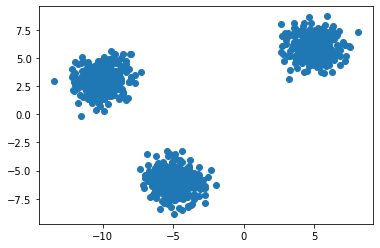

In [70]:
import matplotlib.pyplot as plt


plt.scatter(data[:, 0], data[:, 1])
plt.show()

### K-mean clustering 알고리즘 구현

#### 1. random initialization

In [71]:
K = 3
labels = np.random.randint(0, K, data.shape[0])

In [72]:
labels

array([0, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 0, 1,
       0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 2, 2, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 1, 2,
       1, 0, 2, 1, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 2,
       0, 1, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1,
       0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0,
       2, 0, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0,
       1, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 2, 1, 1, 0, 2, 2, 0, 1,
       0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0,
       1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,

In [73]:
# clustering한 결과를 시각화
def plot_cluster(data, labels, title=None):
    # max(K) = 8
    colors = ['orange','blue','green', 'gray', 'olive', 'red', 'purple', 'cyan']
    for i, c in enumerate(colors):
        data_i = data[labels==i]
        plt.scatter(data_i[:, 0], data_i[:, 1], c=c)
    
    if title is not None:
        plt.title(title)
    plt.show()

In [74]:
# calculate centroid
def calculate_means(data, labels, K):
    means = []
    for i in range(K):
        mean_i_x = np.mean(data[labels==i, 0])
        mean_i_y = np.mean(data[labels==i, 1])
        means.append([mean_i_x, mean_i_y])
    means = np.array(means)
    
    return means

In [75]:
means = calculate_means(data,labels,K)

In [76]:
means

array([[-3.07353213,  1.4635314 ],
       [-2.97472651,  1.27628018],
       [-3.96760689,  0.29711546]])

In [77]:
# Re-labeling with centroid
def assign_data(data, means):
    diff = data[:,None,:] - means[None,:,:] # (N,K,2)
    diff = np.mean(diff**2,-1) # (N,K)
    labels = np.argmin(diff,-1)
    return labels

In [78]:
labels = assign_data(data,means)

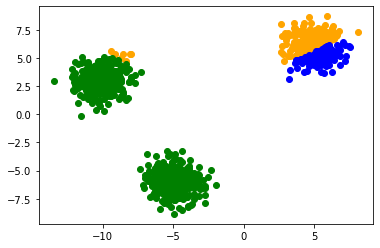

In [79]:
plot_cluster(data, labels)

#### Fitting Clustering model

In [80]:
n_iter = 5

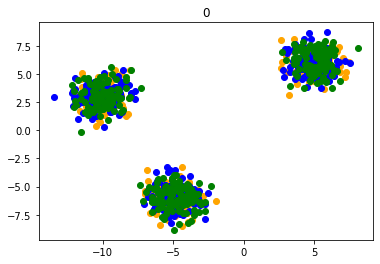

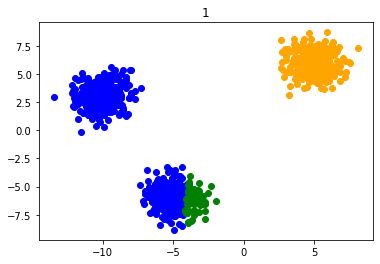

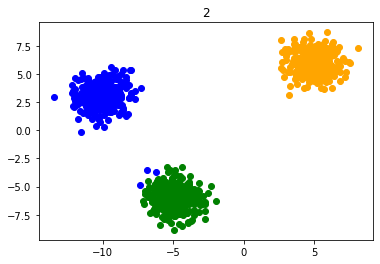

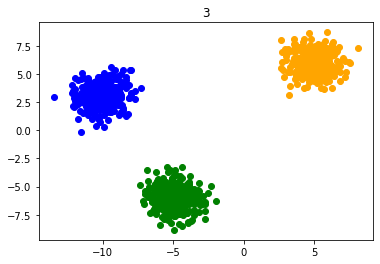

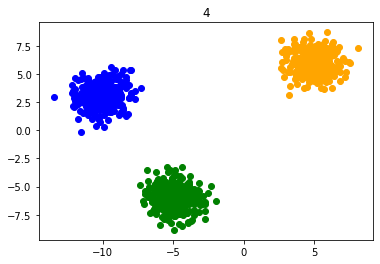

In [81]:
K = 3
labels = np.random.randint(0, K, data.shape[0])

for i in range(n_iter):
    plot_cluster(data, labels, title=i)
    means = calculate_means(data, labels, K)
    labels = assign_data(data, means)

## Scikit-learn을 통한 clustering

In [82]:
from sklearn.datasets import make_blobs


# 데이터 샘플 생성
n_samples = 4000
n_components = 4

X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)

### 클러스터링 모델 학습

In [85]:
from sklearn.cluster import KMeans


# Calculate seeds from kmeans
model = KMeans(n_clusters=4, random_state=42)
y_pred = model.fit_predict(X)


### 클러스터링 결과 시각화

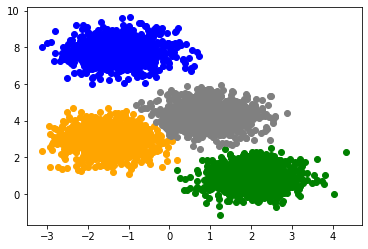

In [86]:
plot_cluster(X, y_pred)

- Try for another data

In [87]:
from sklearn.datasets import make_moons


X, y_true = make_moons(n_samples=300, noise=0.05, random_state=42)

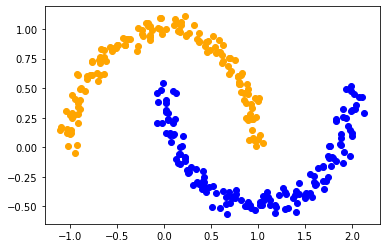

In [88]:
plot_cluster(X, y_true)

In [89]:
model = KMeans(n_clusters=2, random_state=42)
y_pred = model.fit_predict(X)

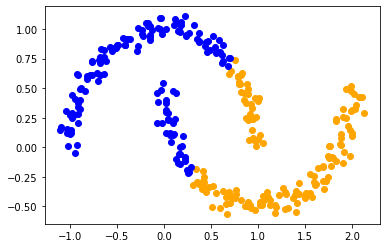

In [90]:
plot_cluster(X, y_pred)

In [91]:
from sklearn.datasets import make_circles


X, y_true = make_circles(n_samples=300)

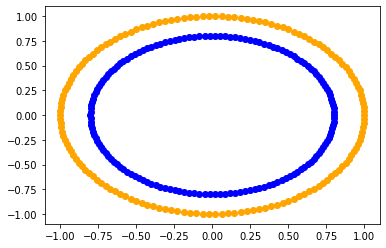

In [92]:
plot_cluster(X, y_true)

In [93]:
model = KMeans(n_clusters=2, random_state=42)
y_pred = model.fit_predict(X)

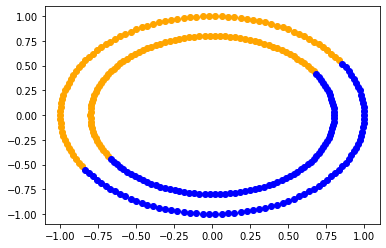

In [94]:
plot_cluster(X, y_pred)

K-mean 알고리즘 특성상, 직선으로 나눌 수 없는 데이터 분포에 대해선 제대로 분류를 하지 못하는 것을 알 수 있다.